In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('merged_dataset.csv')


Step 1: Initial Data Inspection

In [5]:
# first few rows
print(df.head())


                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


Step 4: Exploratory Analysis

In [10]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32337 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32337 non-null  object
 1   Language  32337 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB
None


In [12]:
# Summary statistics
print(df.describe())

                                                     Text Language
count                                               32337    32337
unique                                              32126       30
top     haec commentatio automatice praeparata res ast...  English
freq                                                   48     2385


In [14]:
# Check for missing values
print(df.isnull().sum())

Text        0
Language    0
dtype: int64


In [16]:
# check shape
print(df.shape)

(32337, 2)


1. Understand the Dataset

In [19]:
# Summary of categorical columns:
print(df['Language'].value_counts())


Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Romanian      1000
Persian       1000
Pushto        1000
Swedish       1000
Estonian      1000
Korean        1000
Chinese       1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Japanese      1000
Thai          1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Name: count, dtype: int64


2. Analyze the Language Column

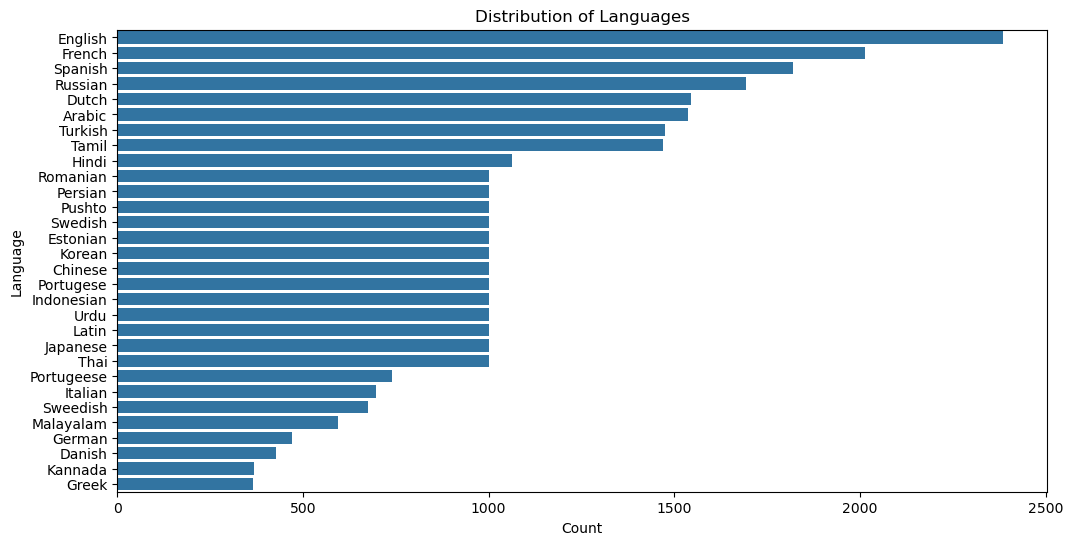

In [22]:
# Visualize the distribution of languages:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(y='Language', data=df, order=df['Language'].value_counts().index)
plt.title('Distribution of Languages')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()


Language
English     7.375452
French      6.228160
Spanish     5.625135
Russian     5.232396
Dutch       4.780901
Arabic      4.749977
Turkish     4.558246
Tamil       4.542784
Hindi       3.287256
Romanian    3.092433
Name: proportion, dtype: float64


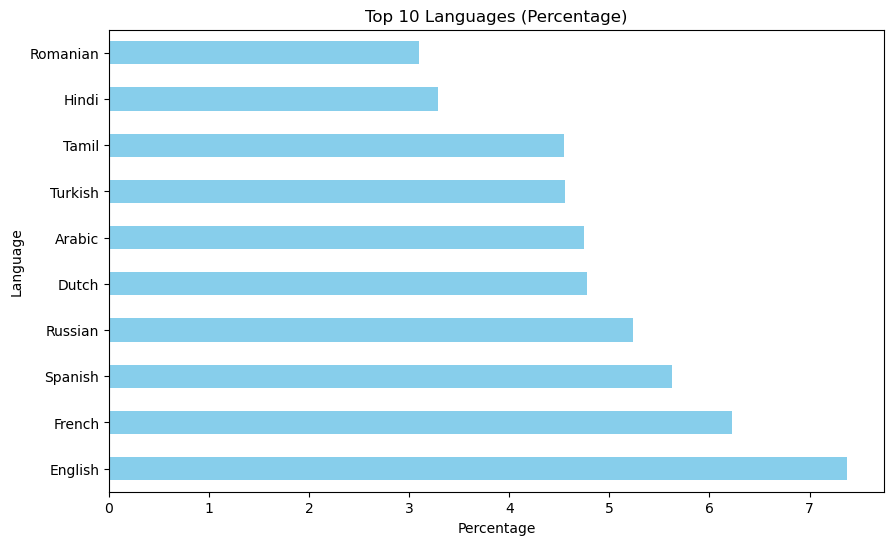

In [23]:
# b. Percentage of Top Languages:
top_languages = df['Language'].value_counts(normalize=True).head(10) * 100
print(top_languages)

top_languages.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Languages (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('Language')
plt.show()


4. Language-Based Insights

5. Text Sample Analysis

In [27]:
# View a few random samples for specific languages:
language_sample = df[df['Language'] == 'English'].sample(5)
print(language_sample['Text'])


22724    [344] Another sister project of Wikipedia, Wik...
22580    Several MediaWiki extensions are installed[232...
22160    Species that were unable to adapt to the chang...
22489    "[188] In 2008, researchers at Carnegie Mellon...
22870    There is neither a separate reinforcement inpu...
Name: Text, dtype: object


# Text Cleaning Steps

In [32]:
import re

def clean_text(text):
    # Remove text in brackets
    text = re.sub(r'\[.*?\]', '', text)
    return text.strip()

# Apply to the entire dataset
df['Cleaned_Text'] = df['Text'].apply(clean_text)


In [34]:
# 2. Lowercasing: Normalize text by converting it to lowercase
df['Cleaned_Text'] = df['Cleaned_Text'].str.lower()


In [36]:
# 3. Remove Special Characters: Eliminate unwanted characters like punctuation or digits (if necessary):
df['Cleaned_Text'] = df['Cleaned_Text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)


In [37]:
# 4. Remove Extra Whitespace: Ensure no extra spaces exist:
df['Cleaned_Text'] = df['Cleaned_Text'].str.replace(r'\s+', ' ', regex=True).str.strip()


In [38]:
# 5. Verify Cleaning: Check a few rows to ensure the cleaning worked as expected:
print(df[['Text', 'Cleaned_Text']].head())


                                                Text  \
0  klement gottwaldi surnukeha palsameeriti ning ...   
1  sebes joseph pereira thomas  på eng the jesuit...   
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...   
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...   
4  de spons behoort tot het geslacht haliclona en...   

                                        Cleaned_Text  
0  klement gottwaldi surnukeha palsameeriti ning ...  
1  sebes joseph pereira thomas p eng the jesuits ...  
2                               thanon charoen krung  
3                                                     
4  de spons behoort tot het geslacht haliclona en...  


# Refinements to Cleaning

In [40]:
# 1. Preserve Non-Latin Scripts: Modify the regex to retain non-Latin characters.
df['Cleaned_Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True).str.strip()


In [42]:
# Convert the cleaned text to lowercase
df['Cleaned_Text'] = df['Cleaned_Text'].str.lower()


In [43]:
# 2. Handle Empty Rows: After cleaning, identify rows with empty Cleaned_Text and decide:

# Drop them:
df = df[df['Cleaned_Text'] != '']

# Replace with placeholders:
df['Cleaned_Text'] = df['Cleaned_Text'].replace('', 'NO_CONTENT')



In [45]:
# 3. Inspect cleaned rows again
print(df[['Text', 'Cleaned_Text']].sample(10))


                                                    Text  \
16679  バーリントン短大での年間の後、アイオワ大学に編入。‐シーズンから公式試合に出場し、このシーズ...   
29878  Bu ortaklaşa ve anında değişiklikler, editörle...   
583    เดือนธันวาคม พศ  มีการลงนามในข้อตกลงระหว่างแอง...   
4094   अक्टूबर  में उन्होने अपनी यात्रा एक नये इसाई क...   
28619                                         извиняюсь.   
23470  പക്ഷേ അദ്ദേഹത്തിന്റെ ജനനം മുതലുള്ള എല്ലാ പ്രധാ...   
12213  तांत्रिक दृष्टि से ज्ञान का प्रकाश इस अनुभव से...   
8897   موبائل فون سروس صرف آٹھمقام کے گردونواع میں دس...   
1369   vareilles - varenne-larconce - varennes-le-gra...   
2643   gunfight at the ok corral is a  american weste...   

                                            Cleaned_Text  
16679  バーリントン短大での年間の後アイオワ大学に編入シーズンから公式試合に出場しこのシーズン平均得...  
29878  bu ortaklaşa ve anında değişiklikler editörler...  
583    เดอนธนวาคม พศ  มการลงนามในขอตกลงระหวางแองโกลา ...  
4094   अकटबर  म उनहन अपन यतर एक नय इसई क रप म बनई उनह...  
28619                                       

In [47]:
# 4. Check Cleaned Text Quality
print(df['Cleaned_Text'].isnull().sum())  # Check for null values
print(df[df['Cleaned_Text'] == 'NO_CONTENT'])  # Inspect placeholder rows


0
Empty DataFrame
Columns: [Text, Language, Cleaned_Text]
Index: []


In [48]:
# Explore Cleaned Data
# Inspect a random sample:
print(df[['Text', 'Cleaned_Text']].sample(10))


                                                    Text  \
939    تاجیکِستان به فارسی تاجیکی тоҷикистон با نام ر...   
4707   بعض التفسيرات المعينة لسورين كيركغور أو كارل م...   
12237  बारडोली सत्याग्रह भारतीय स्वाधीनता संग्राम के ...   
1237   коллегия еэк является исполнительным органом к...   
32186                   ಕ್ಷಮಿಸಿ, ನಾನು ಅದನ್ನು ಹಿಡಿಯಲಿಲ್ಲ.   
19590  موسوی اردبیلی در اعتراض‌ها به نتایج انتخابات ر...   
18602  مولانا ہاشم سمنگانی کے والد الحاج وزیر بائی اپ...   
14721  i omgivningarna runt vimy lake växer i huvudsa...   
16389   yılında nobel barış ödülü avrupa birliğine ve...   
28666  из рубинов салаты из изумрудов и хлеб там сдел...   

                                            Cleaned_Text  
939    تاجیکستان به فارسی تاجیکی тоҷикистон با نام رس...  
4707   بعض التفسيرات المعينة لسورين كيركغور أو كارل م...  
12237  बरडल सतयगरह भरतय सवधनत सगरम क दरन वरष  म गजरत ...  
1237   коллегия еэк является исполнительным органом к...  
32186                                ಕಷಮಸ ನನ

# NO_CONTENT issue Steps to Resolve

In [55]:
# 1. Review the Filtering Logic:
df = df[df['Cleaned_Text'] != 'NO_CONTENT']


In [57]:
# 2. Debug the Cleaning Process: Reapply the cleaning function to a smaller subset of the data to verify which rows were transformed into empty strings:
sample = df.head(20)  # Test on a small sample

# Use .loc to safely update the DataFrame
sample.loc[:, 'Cleaned_Text'] = sample['Text'].str.replace(r'[^\w\s]', '', regex=True).str.strip()

print(sample[['Text', 'Cleaned_Text']])



                                                 Text  \
0   klement gottwaldi surnukeha palsameeriti ning ...   
1   sebes joseph pereira thomas  på eng the jesuit...   
2   ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...   
3   விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...   
4   de spons behoort tot het geslacht haliclona en...   
5   エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...   
6   tsutinalar i̇ngilizce tsuutina kanadada albert...   
7   müller mox figura centralis circulorum doctoru...   
8   برقی بار electric charge تمام زیرجوہری ذرات کی...   
9   シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...   
10  kemunculan pertamanya adalah ketika mencium ka...   
11  barocco pt escândalo de ª página é um filme fr...   
12  association de recherche et de sauvegarde de l...   
13  胡赛尼本人和小说的主人公阿米尔一样，都是出生在阿富汗首都喀布尔，少年时代便离开了这个国家。胡...   
14  한국에서 성씨가 사용되기 시작한 정확한 시기는 알 수 없으나 한자漢字 등 중국 문물...   
15  การฟาดฟันของบรรดาสาวงามในกองประกวด miss beauty...   
16  dorota rabczewska artistini

In [58]:
# 3. Revert and Rerun Cleaning: If needed, reload the original dataset and carefully rerun the cleaning steps to ensure valid rows aren’t unintentionally dropped:


# Reload original
df = pd.read_csv('merged_dataset.csv')

# Apply cleaning steps
df['Cleaned_Text'] = df['Text'].str.replace(r'\[.*?\]', '', regex=True)  # Remove bracketed text
df['Cleaned_Text'] = df['Cleaned_Text'].str.replace(r'[^\w\s]', '', regex=True).str.strip()  # General cleaning
df['Cleaned_Text'] = df['Cleaned_Text'].replace('', 'NO_CONTENT')  # Replace empty text with 'NO_CONTENT'

# Inspect cleaned data
print(df[['Text', 'Cleaned_Text']].sample(10))




                                                    Text  \
9162   陳徵蔚（charles zhengwei chen，年－），出生於台灣台北市，國立中山大學外...   
244    setelah menempatkan anseung ke atas tahta geom...   
24841  Essa foi a primeira enciclopédia interativa (e...   
22334  Anyone can view the latest changes to articles...   
31347                                          أنت تعلم.   
24887  [219] Em dezembro de 2008, o Internet Watch Fo...   
15599  di amerika serikat terdapat beberapa kelompok ...   
27407                 oye cálmate juntos otra frase que.   
24622  [66] A Wikipédia tem trabalhado na mudança par...   
16820  ஆம்ஸ்டர்டேம் பல்கலைக்கழகம் நெதர்லாந்து தலைநகரி...   

                                            Cleaned_Text  
9162   陳徵蔚charles zhengwei chen年出生於台灣台北市國立中山大學外文系學士國立...  
244    setelah menempatkan anseung ke atas tahta geom...  
24841  Essa foi a primeira enciclopédia interativa e ...  
22334  Anyone can view the latest changes to articles...  
31347                                       

In [60]:
# 4. Handle Edge Cases: Instead of dropping rows with NO_CONTENT, inspect them first to ensure valid data isn’t mistakenly excluded:
placeholder_rows = df[df['Cleaned_Text'] == 'NO_CONTENT']
print(placeholder_rows)


                                            Text Language Cleaned_Text
18176                                               Dutch   NO_CONTENT
31109                                          .   Arabic   NO_CONTENT
31110                                          .   Arabic   NO_CONTENT


In [62]:
placeholder_rows = df[df['Cleaned_Text'] == 'NO_CONTENT']
print(placeholder_rows[['Text', 'Language']])


                                            Text Language
18176                                               Dutch
31109                                          .   Arabic
31110                                          .   Arabic


# Handle These NO_CONTENT Rows:

In [67]:
# 1. Drop Rows with NO_CONTENT
df = df[df['Cleaned_Text'] != 'NO_CONTENT']


In [69]:
# 2. Check the cleaned data
print(df[['Text', 'Language', 'Cleaned_Text']].sample(10))

                                                    Text    Language  \
20167  போசு செறிபொருள்கள் அணு லேசர்களை உருவாக்கப் பயன...       Tamil   
7538   -ல் எம் கே தியாகராஜ பாகவதர் தயாரித்த சத்தியசீல...       Tamil   
3213   kubermangugümnaasium oli vene keisririigi ajal...    Estonian   
21050  社名の由来については、年（長元元年）に下総国の平忠常が謀反を企て安房・上総・下総の三カ国を制...    Japanese   
6778   türkiye fed kupası takımı türkiye tenis federa...     Turkish   
16291  мозаику такого размера завершили поздней осень...     Russian   
4991   di garden of prayer akan dibangun rumah ibadah...  Indonesian   
28530                       извините, я не уловил этого.     Russian   
32038  ಪ್ರಾರಂಭಿಸಲು ಇದು ಅತ್ಯುತ್ತಮ ವೀಡಿಯೊ ಆದ್ದರಿಂದ ಆಶಾದ...     Kannada   
1978   “karena st matius mendaftarkan generasi-genera...  Indonesian   

                                            Cleaned_Text  
20167  பச சறபரளகள அண லசரகள உரவககப பயனபடகனறனலசரகளல உளள...  
7538   ல எம க தயகரஜ பகவதர தயரதத சததயசலன எனகற படததல இச...  
3213   kubermangugümnaasium ol

# till perfect.

# Next Steps in EDA Process:

Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1545
Arabic        1534
Turkish       1474
Tamil         1469
Hindi         1063
Romanian      1000
Persian       1000
Pushto        1000
Swedish       1000
Estonian      1000
Korean        1000
Chinese       1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Japanese      1000
Thai          1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Name: count, dtype: int64


<Axes: title={'center': 'Language Distribution'}, xlabel='Language'>

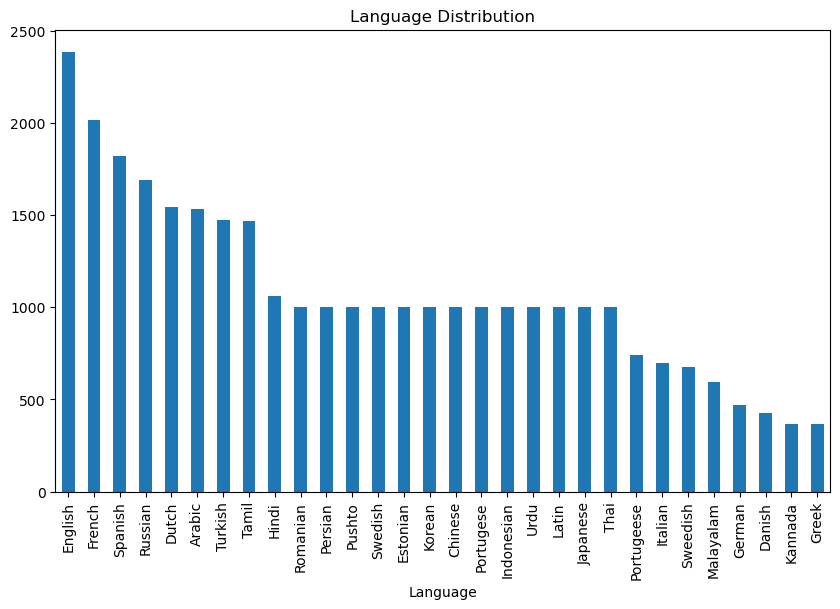

In [73]:
# 1. Examine the Data: 
language_count = df['Language'].value_counts()
print(language_count)
language_count.plot(kind='bar', figsize=(10, 6), title='Language Distribution')


In [76]:
print(df.isnull().sum())  # Check for any missing values


Text            0
Language        0
Cleaned_Text    0
dtype: int64


In [78]:
print(df['Language'].value_counts())  # Check for class imbalance in Language


Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1545
Arabic        1534
Turkish       1474
Tamil         1469
Hindi         1063
Romanian      1000
Persian       1000
Pushto        1000
Swedish       1000
Estonian      1000
Korean        1000
Chinese       1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Japanese      1000
Thai          1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Name: count, dtype: int64


In [80]:
print(df['Cleaned_Text'].sample(5))  # Random sample to check lowercase conversion


20762    mai târziu cometele periodice au fost denumite...
4653     определением священного синода от  марта  года...
23600                     ഈ നർവചനതതയണ നഷട Loss എനന വളകകനനത
22276    The domains wikipediacom and wikipediaorg were...
10518    一阵信风将小猎犬号送至巴西停泊在巴伊亚达尔文于月日在萨尔瓦多登陆他漫步于森林之间为这里的美景...
Name: Cleaned_Text, dtype: object


#  Label Encoding

In [83]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Language' column
df['Language_Label'] = label_encoder.fit_transform(df['Language'])

# Display the mapping of languages to labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


{'Arabic': 0, 'Chinese': 1, 'Danish': 2, 'Dutch': 3, 'English': 4, 'Estonian': 5, 'French': 6, 'German': 7, 'Greek': 8, 'Hindi': 9, 'Indonesian': 10, 'Italian': 11, 'Japanese': 12, 'Kannada': 13, 'Korean': 14, 'Latin': 15, 'Malayalam': 16, 'Persian': 17, 'Portugeese': 18, 'Portugese': 19, 'Pushto': 20, 'Romanian': 21, 'Russian': 22, 'Spanish': 23, 'Swedish': 24, 'Sweedish': 25, 'Tamil': 26, 'Thai': 27, 'Turkish': 28, 'Urdu': 29}


# TF-IDF (Term Frequency-Inverse Document Frequency)

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Use top 1000 features
X_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Text'])

# Convert to array or DataFrame if needed
print(X_tfidf.toarray())  # Array representation
print(tfidf_vectorizer.get_feature_names_out())  # Display feature names


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['10' 'aan' 'aasta' 'aastal' 'ab' 'about' 'ac' 'ad' 'adalah' 'af' 'after'
 'ainsi' 'akan' 'al' 'album' 'all' 'alla' 'als' 'also' 'american' 'an'
 'ancak' 'and' 'andere' 'andra' 'ani' 'anno' 'anos' 'antes' 'ao' 'april'
 'apud' 'are' 'articles' 'as' 'at' 'atau' 'att' 'até' 'au' 'augusti' 'aux'
 'av' 'avec' 'años' 'bagian' 'bahasa' 'bahwa' 'band' 'be' 'beberapa'
 'been' 'ben' 'beskrevs' 'best' 'between' 'bien' 'bij' 'bir' 'brasil' 'bu'
 'but' 'by' 'büyük' 'ca' 'can' 'care' 'casa' 'catalogue' 'ce' 'ces' 'cest'
 'cette' 'che' 'circa' 'city' 'club' 'clubs' 'com' 'come' 'comme'
 'commune' 'como' 'con' 'contra' 'cu' 'cuando' 'cum' 'că' 'da' 'daha'
 'dalam' 'dan' 'dans' 'dapat' 'dar' 'dari' 'das' 'dat' 'data' 'david' 'de'
 'december' 'del' 'delen' 'den' 'dengan' 'depuis' 'der' 'des' 'desde'
 'después' 'det' 'deux' 'deze' 'di' 'dia' 'die' 'di

In [87]:
print(df.columns)


Index(['Text', 'Language', 'Cleaned_Text', 'Language_Label'], dtype='object')


In [90]:
df.to_csv('cleaned_merge_data.csv', index=False)


In [92]:
print(df.columns)


Index(['Text', 'Language', 'Cleaned_Text', 'Language_Label'], dtype='object')


In [94]:
X = X_tfidf
y = df['Language_Label']  #column name target variable


In [96]:
print(df['Language_Label'].unique())


[ 5 24 27 26  3 12 28 15 29 10 19  6  1 14  9 23 20 17 21 22  4  0 16 18
  8  2 11 25  7 13]


In [98]:
from sklearn.preprocessing import LabelEncoder

# Assuming you already encoded labels with LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['Language'])  # Original language column

# Mapping
print(dict(enumerate(encoder.classes_)))


{0: 'Arabic', 1: 'Chinese', 2: 'Danish', 3: 'Dutch', 4: 'English', 5: 'Estonian', 6: 'French', 7: 'German', 8: 'Greek', 9: 'Hindi', 10: 'Indonesian', 11: 'Italian', 12: 'Japanese', 13: 'Kannada', 14: 'Korean', 15: 'Latin', 16: 'Malayalam', 17: 'Persian', 18: 'Portugeese', 19: 'Portugese', 20: 'Pushto', 21: 'Romanian', 22: 'Russian', 23: 'Spanish', 24: 'Swedish', 25: 'Sweedish', 26: 'Tamil', 27: 'Thai', 28: 'Turkish', 29: 'Urdu'}


# training multiple ML models

In [101]:
# 1. Train-Test Split
from sklearn.model_selection import train_test_split

# Assuming X is your TF-IDF matrix and y is your target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [103]:
# 2. Train Base Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}


In [105]:
# Train and Evaluate Models
# Store results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name}: Accuracy = {accuracy:.2f}")


Naive Bayes: Accuracy = 0.82
Support Vector Machine: Accuracy = 0.86
Random Forest: Accuracy = 0.86
Logistic Regression: Accuracy = 0.86


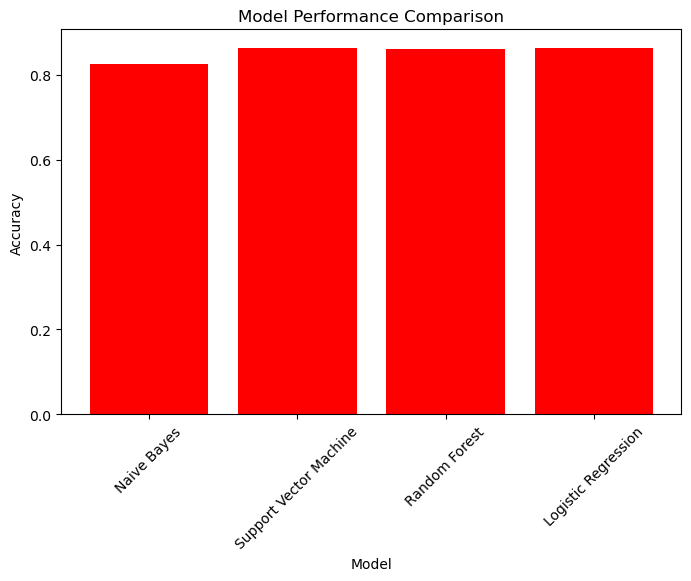

In [107]:
import matplotlib.pyplot as plt

# Plot accuracy scores
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='red')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()


In [109]:
import pandas as pd

results = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes'],
    'Accuracy': [0.86, 0.86, 0.86, 0.82]  
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy
0  Logistic Regression      0.86
1                  SVM      0.86
2        Random Forest      0.86
3          Naive Bayes      0.82


                    Model  Accuracy  Precision    Recall  F1 Score
0             Naive Bayes  0.824803   0.886282  0.824803  0.818218
1  Support Vector Machine  0.863925   0.917008  0.863925  0.870799
2           Random Forest  0.860059   0.913163  0.860059  0.867825
3     Logistic Regression  0.862533   0.914968  0.862533  0.871795


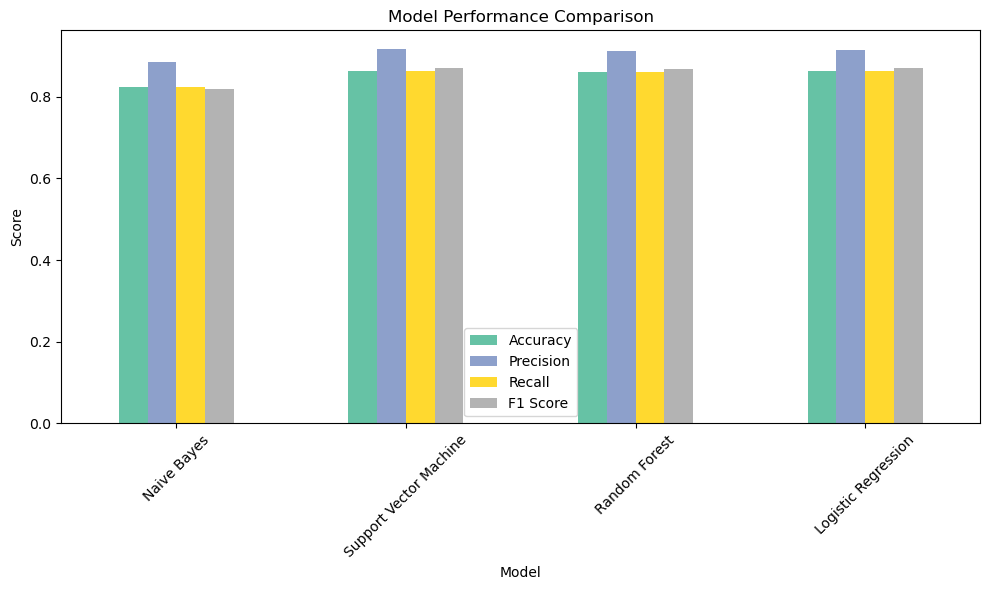

In [111]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Store additional results
model_comparison = []

# Iterate through each model, predict, and calculate metrics
for model_name, model in models.items():
    # Predict using the trained model
    y_pred = model.predict(X_test)
    
    # Calculate the metrics, with zero_division=1 to avoid the warning
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    
    # Append results for comparison
    model_comparison.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create a DataFrame to display the results
comparison_df = pd.DataFrame(model_comparison)

# Display the comparison table
print(comparison_df)

# Visualize the performance using a bar plot
comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 6), cmap='Set2')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


'''Save the Trained Model: After training the SVM model, you can save it to a file. This will allow you to load and use the trained model without retraining.

Use joblib or pickle to save the model:'''

# save model.

In [115]:
print(df.columns)


Index(['Text', 'Language', 'Cleaned_Text', 'Language_Label'], dtype='object')


# Save X_test and y_test ----> To avoid splitting the data repeatedly, save X_test and y_test for future use: 

In [118]:
import joblib

# Save test data
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_test, 'y_test.pkl')


['y_test.pkl']

In [120]:
import joblib

# Save test data
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_test, 'y_test.pkl')

# Print confirmation
print("Test data saved successfully.")


Test data saved successfully.


In [122]:
# To load the saved test data, you can use:

'''
import joblib

# Load the saved test data
X_test = joblib.load('X_test.pkl')
y_test = joblib.load('y_test.pkl')

# Check the loaded data
print(X_test.shape)
print(y_test.shape)

'''

"\nimport joblib\n\n# Load the saved test data\nX_test = joblib.load('X_test.pkl')\ny_test = joblib.load('y_test.pkl')\n\n# Check the loaded data\nprint(X_test.shape)\nprint(y_test.shape)\n\n"

In [124]:
# Step 1: Save All Trained Models
import joblib

# Assuming your models are stored in the `models` dictionary after training
for model_name, model in models.items():
    # Save each model to a file
    joblib.dump(model, f'{model_name}_model.pkl')
    print(f"{model_name} model saved successfully!")

''' This code will save each model in a .pkl file with the name corresponding to the model, such as:

Naive Bayes_model.pkl
Support Vector Machine_model.pkl
Random Forest_model.pkl
Logistic Regression_model.pkl
'''

Naive Bayes model saved successfully!
Support Vector Machine model saved successfully!
Random Forest model saved successfully!
Logistic Regression model saved successfully!


' This code will save each model in a .pkl file with the name corresponding to the model, such as:\n\nNaive Bayes_model.pkl\nSupport Vector Machine_model.pkl\nRandom Forest_model.pkl\nLogistic Regression_model.pkl\n'

In [126]:
# Step 1: Load the Saved Models
import joblib

# Load the SVM and Logistic Regression models
svm_model = joblib.load("Support Vector Machine_model.pkl")
lr_model = joblib.load("Logistic Regression_model.pkl")

print("Models loaded successfully!")


Models loaded successfully!


In [128]:
# Step 2: Evaluate Models on Test Data
from sklearn.metrics import classification_report, accuracy_score

# SVM Predictions
svm_predictions = svm_model.predict(X_test)
# Evaluate SVM model
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

# Logistic Regression Predictions
lr_predictions = lr_model.predict(X_test)  # Using lr_model for Logistic Regression
# Logistic Regression Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))  # Correct variable name
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))  # Correct variable name

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       307
           1       0.33      0.01      0.02       200
           2       0.96      0.82      0.89        85
           3       0.99      0.95      0.97       309
           4       0.87      0.97      0.92       477
           5       0.98      0.94      0.96       200
           6       0.96      0.96      0.96       403
           7       0.88      0.88      0.88        94
           8       1.00      0.82      0.90        73
           9       1.00      0.97      0.99       213
          10       1.00      0.98      0.99       200
          11       0.98      0.86      0.92       139
          12       0.23      0.94      0.37       200
          13       1.00      0.69      0.82        74
          14       0.99      0.83      0.91       200
          15       0.96      0.94      0.95       200
          16       1.00      0.42      0.59       119


In [130]:
import pandas as pd

# Combine predictions and true labels into a DataFrame
results = pd.DataFrame({'Actual': y_test, 
                        'SVM_Predicted': svm_predictions,
                        'LR_Predicted': lr_predictions})

# Analyze performance for each language
languages = results['Actual'].unique()
for lang in languages:
    print(f"\nPerformance for Language: {lang}")
    lang_results = results[results['Actual'] == lang]
    
    # SVM Performance
    svm_acc = (lang_results['Actual'] == lang_results['SVM_Predicted']).mean()
    print(f"SVM Accuracy: {svm_acc:.2f}")

    # Logistic Regression Performance
    lr_acc = (lang_results['Actual'] == lang_results['LR_Predicted']).mean()
    print(f"Logistic Regression Accuracy: {lr_acc:.2f}")



Performance for Language: 12
SVM Accuracy: 0.94
Logistic Regression Accuracy: 0.94

Performance for Language: 10
SVM Accuracy: 0.98
Logistic Regression Accuracy: 0.98

Performance for Language: 22
SVM Accuracy: 0.86
Logistic Regression Accuracy: 0.87

Performance for Language: 4
SVM Accuracy: 0.97
Logistic Regression Accuracy: 0.97

Performance for Language: 28
SVM Accuracy: 0.87
Logistic Regression Accuracy: 0.87

Performance for Language: 26
SVM Accuracy: 0.84
Logistic Regression Accuracy: 0.84

Performance for Language: 0
SVM Accuracy: 0.96
Logistic Regression Accuracy: 0.96

Performance for Language: 23
SVM Accuracy: 0.96
Logistic Regression Accuracy: 0.95

Performance for Language: 6
SVM Accuracy: 0.96
Logistic Regression Accuracy: 0.96

Performance for Language: 17
SVM Accuracy: 0.99
Logistic Regression Accuracy: 0.99

Performance for Language: 21
SVM Accuracy: 0.98
Logistic Regression Accuracy: 0.98

Performance for Language: 3
SVM Accuracy: 0.95
Logistic Regression Accuracy: 0

In [146]:
import pandas as pd

# Your label encoding mapping
language_dict = {
    'Arabic': 0, 'Chinese': 1, 'Danish': 2, 'Dutch': 3, 'English': 4, 
    'Estonian': 5, 'French': 6, 'German': 7, 'Greek': 8, 'Hindi': 9, 
    'Indonesian': 10, 'Italian': 11, 'Japanese': 12, 'Kannada': 13, 
    'Korean': 14, 'Latin': 15, 'Malayalam': 16, 'Persian': 17, 
    'Portugeese': 18, 'Portugese': 19, 'Pushto': 20, 'Romanian': 21, 
    'Russian': 22, 'Spanish': 23, 'Swedish': 24, 'Sweedish': 25, 
    'Tamil': 26, 'Thai': 27, 'Turkish': 28, 'Urdu': 29
}

# Convert the dictionary to a DataFrame
language_df = pd.DataFrame(list(language_dict.items()), columns=['Language', 'Label Encoding'])

# Sort by Label Encoding for better organization
language_df = language_df.sort_values(by='Label Encoding')

# Display the table without the index
print(language_df.to_string(index=False))


  Language  Label Encoding
    Arabic               0
   Chinese               1
    Danish               2
     Dutch               3
   English               4
  Estonian               5
    French               6
    German               7
     Greek               8
     Hindi               9
Indonesian              10
   Italian              11
  Japanese              12
   Kannada              13
    Korean              14
     Latin              15
 Malayalam              16
   Persian              17
Portugeese              18
 Portugese              19
    Pushto              20
  Romanian              21
   Russian              22
   Spanish              23
   Swedish              24
  Sweedish              25
     Tamil              26
      Thai              27
   Turkish              28
      Urdu              29


In [148]:
#Predict on New Samples

In [150]:
import joblib

# Save the vectorizer after fitting it
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [152]:
import joblib

# Load the saved vectorizer
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Check if the vectorizer loaded properly
print("Vectorizer loaded successfully!")


Vectorizer loaded successfully!


In [154]:
print(df.columns)


Index(['Text', 'Language', 'Cleaned_Text', 'Language_Label'], dtype='object')
